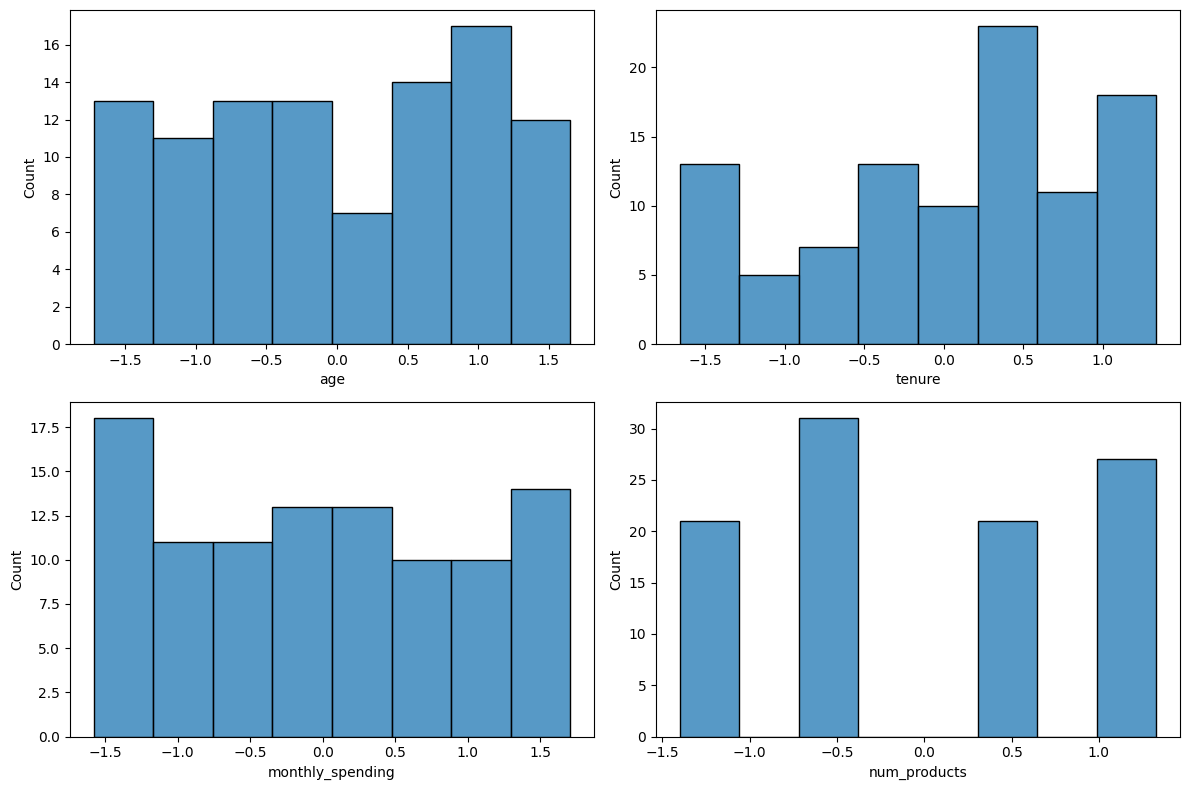

In [1]:
#Data Aggregation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset creation
data = {
    'customer_id': range(1, 101),
    'age': np.random.randint(20, 70, 100),
    'tenure': np.random.randint(1, 10, 100),
    'monthly_spending': np.random.uniform(50, 500, 100),
    'num_products': np.random.randint(1, 5, 100)
}
df = pd.DataFrame(data)

# Handling missing values
df.fillna(df.mean(), inplace=True)  # Fill any missing values with the mean of each column

# Normalizing numerical columns
scaler = StandardScaler()
df[['age', 'tenure', 'monthly_spending', 'num_products']] = scaler.fit_transform(df[['age', 'tenure', 'monthly_spending', 'num_products']])

# Feature distribution visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['age'], ax=axs[0, 0])
sns.histplot(df['tenure'], ax=axs[0, 1])
sns.histplot(df['monthly_spending'], ax=axs[1, 0])
sns.histplot(df['num_products'], ax=axs[1, 1])
plt.tight_layout()
plt.show()


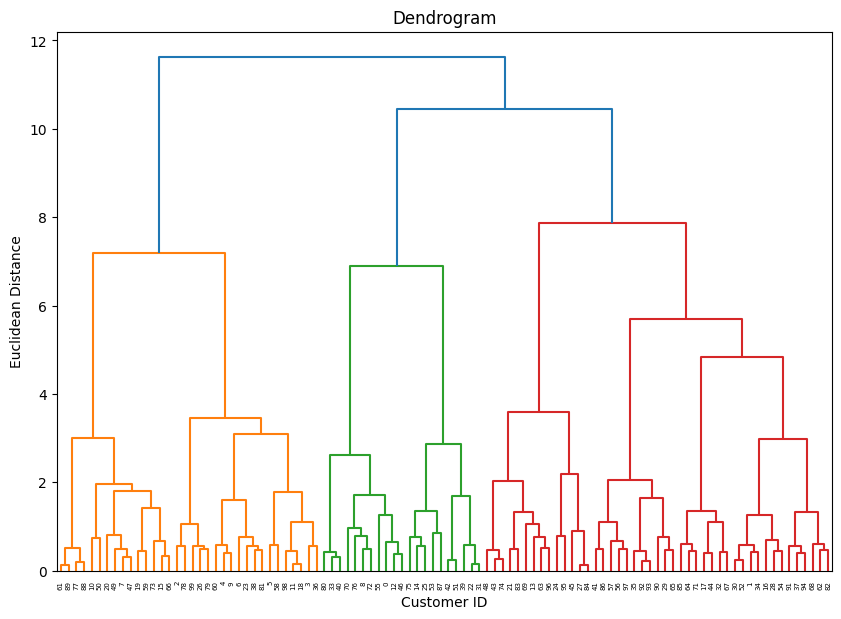

In [3]:
#Clustering Using Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Selecting relevant features for clustering
X = df[['age', 'tenure', 'monthly_spending']]

# Plotting dendrogram to decide on the number of clusters
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Customer ID")
plt.ylabel("Euclidean Distance")
plt.show()

# Using AgglomerativeClustering with 3 clusters as an example
# Removed the 'affinity' argument as it's not needed with 'ward' linkage
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['cluster'] = cluster.fit_predict(X)

In [4]:
#Cluster Evaluation
# Analyze clusters by calculating summary statistics for each feature
cluster_summary = df.groupby('cluster').agg({
    'age': ['mean', 'median', 'std'],
    'tenure': ['mean', 'median', 'std'],
    'monthly_spending': ['mean', 'median', 'std'],
    'num_products': ['mean', 'median', 'std']
})
print("Cluster Summary Statistics:\n", cluster_summary)


Cluster Summary Statistics:
               age                        tenure                      \
             mean    median       std      mean    median       std   
cluster                                                               
0        0.866127  0.918284  0.535704  0.121963  0.213540  0.860822   
1       -0.859262 -0.878677  0.560638  0.643265  0.588172  0.633173   
2       -0.464800 -0.475278  0.824698 -1.302826 -1.659618  0.434899   

        monthly_spending                     num_products                      
                    mean    median       std         mean    median       std  
cluster                                                                        
0              -0.178133 -0.310414  0.975009     0.095012  0.418459  1.065043  
1               0.396727  0.459876  0.938616    -0.036388 -0.491234  0.982580  
2              -0.260605 -0.291194  1.022086    -0.144684 -0.491234  0.931100  


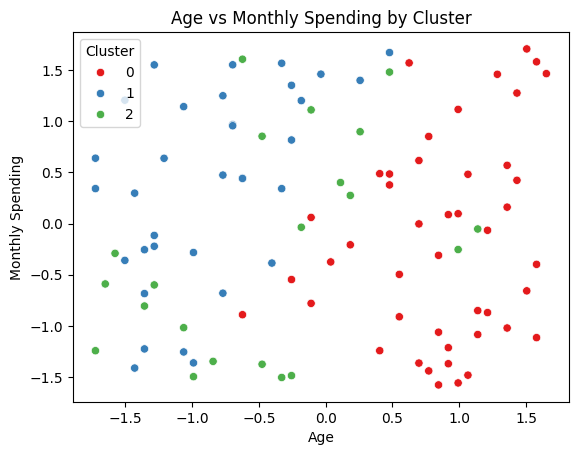

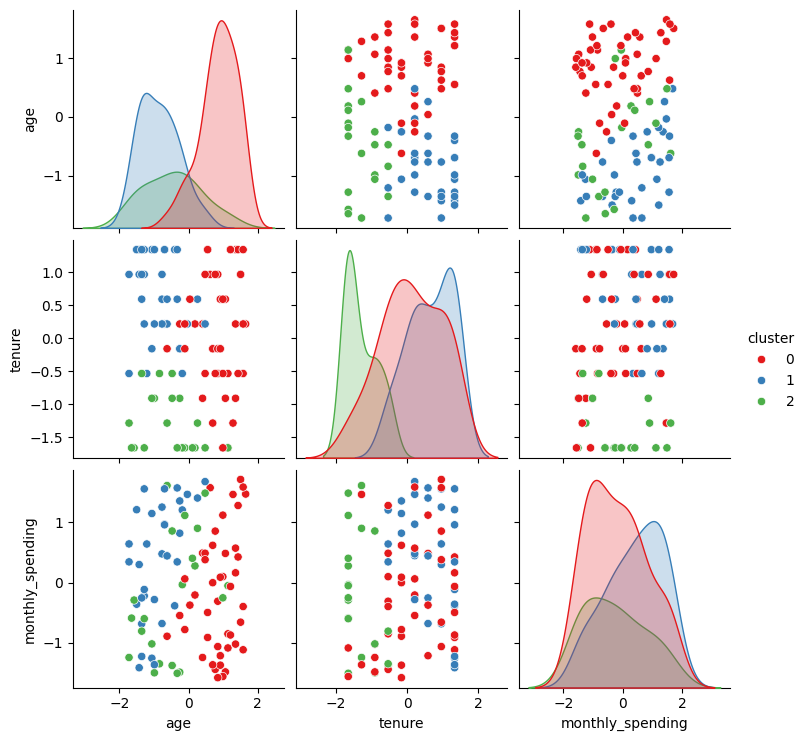

In [5]:
#Cluster Profiling
# Visualizing clusters with a scatter plot
sns.scatterplot(data=df, x='age', y='monthly_spending', hue='cluster', palette='Set1')
plt.title("Age vs Monthly Spending by Cluster")
plt.xlabel("Age")
plt.ylabel("Monthly Spending")
plt.legend(title="Cluster")
plt.show()

# Pair plot to show relationships between features, color-coded by cluster
sns.pairplot(df, vars=['age', 'tenure', 'monthly_spending'], hue='cluster', palette='Set1')
plt.show()
